# Data distribution

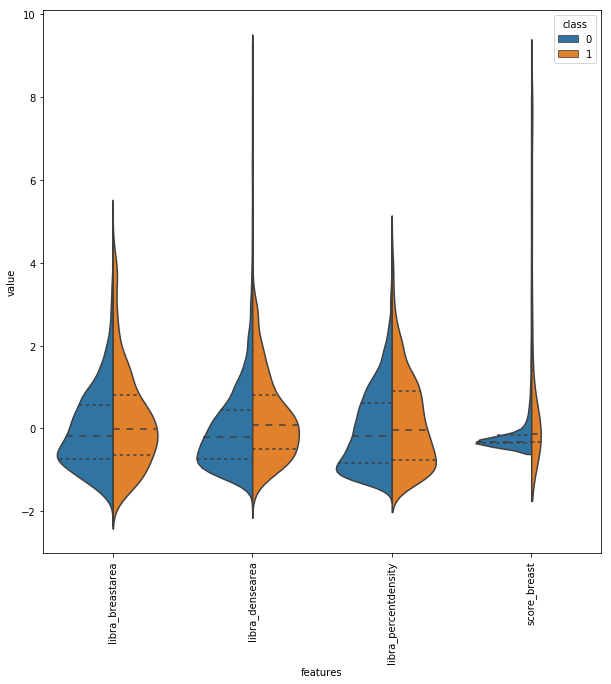

In [138]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

# X = df[features]
# y = df['class']

# scaler = StandardScaler().fit(X)
# X = pd.DataFrame(scaler.transform(X), columns = X.columns)
#y = df['class']
raw_data_path = './original.csv'

df = pd.read_csv(raw_data_path)

df.columns=['anon_patientid', 'exam_year', 'x_groundtruth', 'x_cancer_laterality',"imagelaterality",
           "viewposition","libra_breastarea", "libra_densearea", "libra_percentdensity", 'ai_score_breast']

# split X (features), y (PD stage label) from the dataframe
features = ['ai_score_breast', "libra_breastarea", "libra_densearea", "libra_percentdensity"]

X = df[features]
y = df['x_groundtruth']

all_dataframe_features = pd.DataFrame({'ID':df['anon_patientid'],'score_breast':df['ai_score_breast'],'libra_breastarea':df['libra_breastarea'], 
                                       'libra_densearea':df['libra_densearea'],'libra_percentdensity':df['libra_percentdensity'],'class':df['x_groundtruth']})

all_dataframe_features.sort_values(by=['ID'],ascending=True,inplace=True)



data=all_dataframe_features
y = data['class']                          # M or B 
list = ['ID']
x = data.drop(list,axis = 1 )
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,1:6]],axis=1)
data = pd.melt(data,id_vars="class",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="class", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

# calculate Ai score features

In [92]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [175]:
file_name="./original.csv"
data = pd.read_csv(file_name,  header=0)


In [176]:
len(np.unique(data["anon_patientid"]))

778

In [177]:
all_dataframe = pd.DataFrame({'case':data["anon_patientid"],"AI_score":data["ai_score_breast"],'x_groundtruth':data["x_groundtruth"],
                                'cancer_laterality':data["x_cancer_laterality"], "image_laterality":data["imagelaterality"],
                               "view_position":data["viewposition"], "libra_breastarea":data["libra_breastarea"], 
                              "libra_densearea":data["libra_densearea"], "libra_percentdensity":data["libra_percentdensity"]})
all_dataframe.sort_values(by=['case'],ascending=True,inplace=True)

In [178]:
dict_all={}
for index, row in all_dataframe.iterrows():
    id = row['case']
    if id in dict_all.keys():
        dict_all[id]=dict_all[id].append([row], ignore_index=True)
    else:
        dict_all[id]= pd.DataFrame([row])
        

In [179]:
features=[]
def feature_score(dict_group):
    features = []
    for keys,values in dict_group.items():
        AI_score = values['AI_score']
        score_max=AI_score.max()
        score_mean=AI_score.mean()
        score_median=AI_score.median()
                    
        features.append([values['case'][0],score_max, score_mean, score_median, values["x_groundtruth"][0]])
        plb = pd.DataFrame(features)
        plb.columns = ['case','score_max','score_mean','score_median',"x_groundtruth"]
    return plb

In [17]:
features["case"]

0        2
1        4
2        5
3        6
4        7
      ... 
773    994
774    996
775    997
776    998
777    999
Name: case, Length: 778, dtype: int64

In [60]:
features = feature_score(dict_all)

In [61]:
features.to_csv("./original_score_all.csv")

# Score Features Data Description

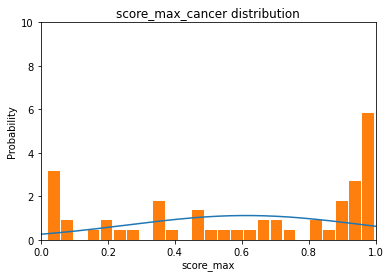

In [34]:

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt

# Probability Density Function of Normal Distribution

def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))
    return pdf

if __name__ == '__main__':

    data = pd.read_csv('./original_score_cancer.csv')
    length = data['score_max'] 
    mean = length.mean() 
    x = np.arange(0, 1, 0.0001)

    y = normfun(x, mean, std)

    plt.plot(x, y)

    plt.hist(length, bins=25, rwidth=0.9, density=True)
    axes = plt.gca()
    axes.set_xlim([0,1])
    axes.set_ylim([0,10])
    plt.title('score_max_cancer distribution')
    plt.xlabel('score_max')
    plt.ylabel('Probability')


    plt.show()


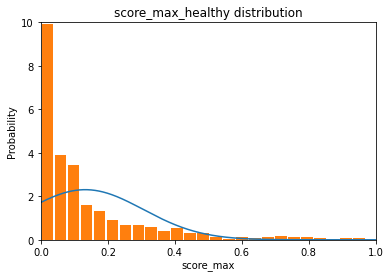

In [35]:
    data = pd.read_csv('./original_score_healthy.csv') # 载入数据文件
    length = data['score_max'] 
    mean = length.mean() 
    std = length.std()  

    x = np.arange(0, 1, 0.0001)
    y = normfun(x, mean, std)
    plt.plot(x, y)
    plt.hist(length, bins=25, rwidth=0.9, density=True)
    axes = plt.gca()
    axes.set_xlim([0,1])
    axes.set_ylim([0,10])
    plt.title('score_max_healthy distribution')
    plt.xlabel('score_max')
    plt.ylabel('Probability')
    plt.show()


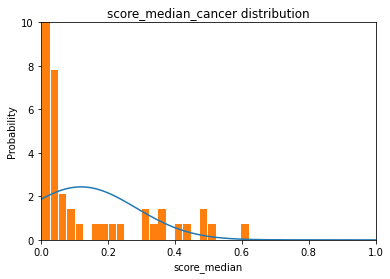

In [38]:
#
# 本文以某一批产品的长度为数据集
# 在此数据集的基础上绘制直方图和正态分布曲线
#

import pandas as pd  # pandas是一个强大的分析结构化数据的工具集
import numpy as np  # numpy是Python中科学计算的核心库
import matplotlib.pyplot as plt  # matplotlib数据可视化神器

# 正态分布的概率密度函数
#   x      数据集中的某一具体测量值
#   mu     数据集的平均值，反映测量值分布的集中趋势
#   sigma  数据集的标准差，反映测量值分布的分散程度
def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))
    return pdf

if __name__ == '__main__':

    data = pd.read_csv('./original_score_cancer.csv') # 载入数据文件
    length = data['score_median'] # 获得长度数据集
    mean = length.mean() # 获得数据集的平均值
    std = length.std()   # 获得数据集的标准差

    # 设定X轴：前两个数字是X轴的起止范围，第三个数字表示步长
    # 步长设定得越小，画出来的正态分布曲线越平滑
    x = np.arange(0, 1, 0.0001)
    # 设定Y轴，载入刚才定义的正态分布函数
    y = normfun(x, mean, std)
    # 绘制数据集的正态分布曲线
    plt.plot(x, y)
    # 绘制数据集的直方图
    plt.hist(length, bins=25, rwidth=0.9, density=True)
    axes = plt.gca()
    axes.set_xlim([0,1])
    axes.set_ylim([0,10])
    plt.title('score_median_cancer distribution')
    plt.xlabel('score_median')
    plt.ylabel('Probability')

    # 输出正态分布曲线和直方图
    plt.show()


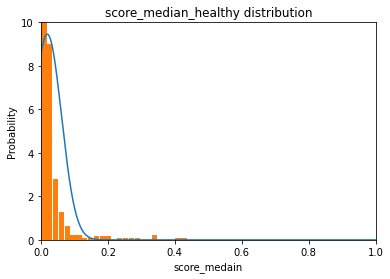

In [39]:
    data = pd.read_csv('./original_score_healthy.csv') # 载入数据文件
    length = data['score_median'] # 获得长度数据集
    mean = length.mean() # 获得数据集的平均值
    std = length.std()   # 获得数据集的标准差

    # 设定X轴：前两个数字是X轴的起止范围，第三个数字表示步长
    # 步长设定得越小，画出来的正态分布曲线越平滑
    x = np.arange(0, 1, 0.0001)
    # 设定Y轴，载入刚才定义的正态分布函数
    y = normfun(x, mean, std)
    # 绘制数据集的正态分布曲线
    plt.plot(x, y)
    # 绘制数据集的直方图
    plt.hist(length, bins=25, rwidth=0.9, density=True)
    axes = plt.gca()
    axes.set_xlim([0,1])
    axes.set_ylim([0,10])
    plt.title('score_median_healthy distribution')
    plt.xlabel('score_medain')
    plt.ylabel('Probability')

    # 输出正态分布曲线和直方图
    plt.show()


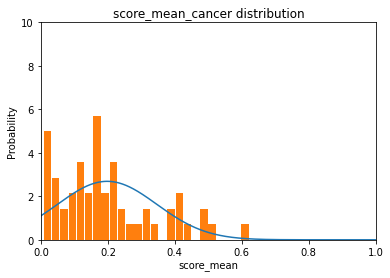

In [36]:


import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt  

def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))
    return pdf

if __name__ == '__main__':

    data = pd.read_csv('./original_score_cancer.csv') # 载入数据文件
    length = data['score_mean']
    mean = length.mean() 
    std = length.std()   
    x = np.arange(0, 1, 0.0001)
    y = normfun(x, mean, std)
    plt.plot(x, y)
    plt.hist(length, bins=25, rwidth=0.9, density=True)
    axes = plt.gca()
    axes.set_xlim([0,1])
    axes.set_ylim([0,10])
    plt.title('score_mean_cancer distribution')
    plt.xlabel('score_mean')
    plt.ylabel('Probability')

    plt.show()


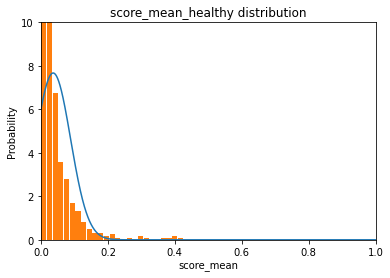

In [37]:
    data = pd.read_csv('./original_score_healthy.csv') # 载入数据文件
    length = data['score_mean'] # 获得长度数据集
    mean = length.mean() # 获得数据集的平均值
    std = length.std()   # 获得数据集的标准差

    # 设定X轴：前两个数字是X轴的起止范围，第三个数字表示步长
    # 步长设定得越小，画出来的正态分布曲线越平滑
    x = np.arange(0, 1, 0.0001)
    # 设定Y轴，载入刚才定义的正态分布函数
    y = normfun(x, mean, std)
    # 绘制数据集的正态分布曲线
    plt.plot(x, y)
    # 绘制数据集的直方图
    plt.hist(length, bins=25, rwidth=0.9, density=True)
    axes = plt.gca()
    axes.set_xlim([0,1])
    axes.set_ylim([0,10])
    plt.title('score_mean_healthy distribution')
    plt.xlabel('score_mean')
    plt.ylabel('Probability')

    # 输出正态分布曲线和直方图
    plt.show()


In [76]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# set path to all_dataset
raw_data_path = './original_score_all.csv'
df = pd.read_csv(raw_data_path)

df.columns=['ID', 'score_max', 'score_mean', 'score_median', 'class']

# split X (features), y (PD stage label) from the dataframe
features = ['score_max', 'score_mean', 'score_median']
df_plot=['score_max', 'score_mean', 'score_median', 'class']
X = df[features]
y = df['class']

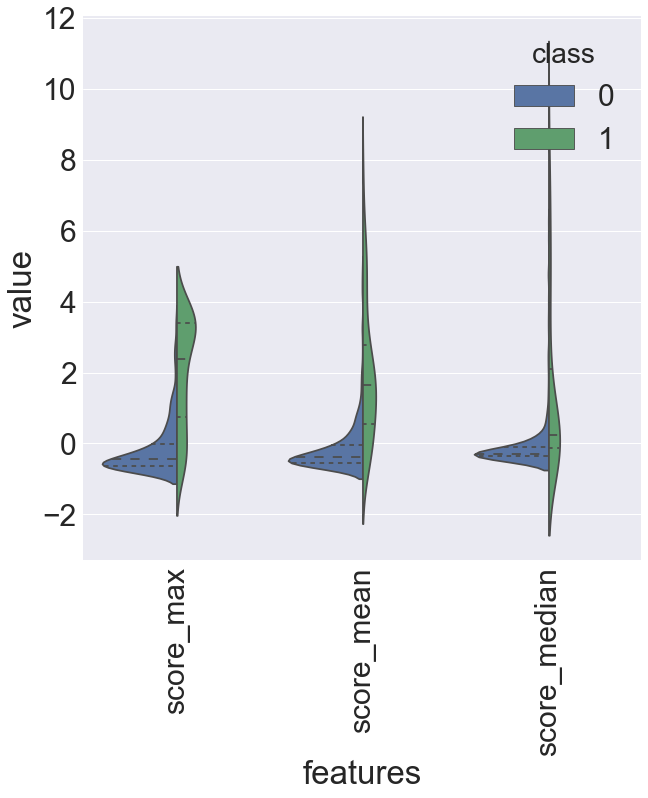

In [136]:
list = ['ID']
zx = data.drop(list,axis = 1 )
data_dia = y
data_fea = X
data_n_2 = (data_fea - data_fea.mean()) / (data_fea.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:3]],axis=1)
data = pd.melt(data,id_vars="class",
                    var_name="features",
                    value_name='value')
#data["class"]=data["class"].astype(int)
plt.figure(figsize=(10,10))
#sns.set(font_scale=3)
sns.violinplot(x="features", y="value", hue="class", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

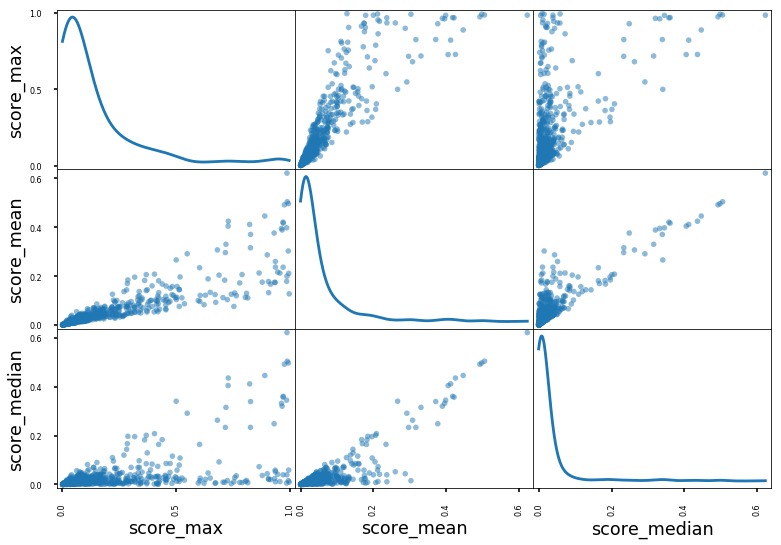

In [79]:
from pandas.plotting import scatter_matrix
%matplotlib inline
plt.style.use('seaborn-poster')
#plt.figure(figsize = (25,25))
scatter_matrix(df[df.columns[[1, 2, 3]]], diagonal = 'density')
plt.show()

## Comparison of F-test and mutual information

Automatically created module for IPython interactive environment


D:\anaconda3\envs\theano_3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):
D:\anaconda3\envs\theano_3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


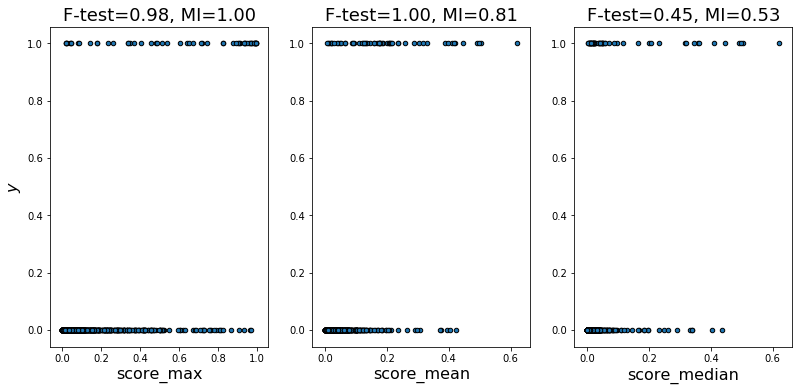

In [44]:
#Comparison of F-test and mutual information
print(__doc__)


import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression,f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rand_state = np.random.RandomState(32)

raw_data_path = './original_score_all.csv'

df = pd.read_csv(raw_data_path)

df.columns=['ID', 'score_max', 'score_mean', 'score_median', 'class']

# split X (features), y (PD stage label) from the dataframe
features = ['score_max', 'score_mean', 'score_median']

X = df[features]
y = df['class']

np.random.seed(0)

f_test, _ = f_classif(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

X=np.array(X)
y=np.array(y)

plt.figure(figsize=(18, 20))
for i in range(3):
    plt.subplot(3, 4, i + 1)
    plt.scatter(X[:, i], y, edgecolor='black', s=20)
#    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    plt.xlabel(features[i], fontsize=16)
    if i == 0:
        plt.ylabel("$y$", fontsize=16)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]),
              fontsize=18)
plt.show()

# classification

In [7]:
##all coding is runing on env theano_3
# set plots inline for ipython
%matplotlib inline

# import system & ipython utils
import os
import subprocess
from IPython.display import Image
import time

# numpy and visualization libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import data preprocessing, cross validaiton

from sklearn.preprocessing import StandardScaler


from sklearn.tree import export_graphviz

# classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# performance measures
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss, hamming_loss, mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import matthews_corrcoef, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

# personal libs
from mwutil.ml import run_training_range
from mwutil.ml import compare_classifiers

# set random seed
rand_state = np.random.RandomState(32)
# set the scoring function
# set the scoring function
scoring_function_label = 'f1_weighted'
scoring_function = f1_score

# set number of folds for cross validation
n_folds = 3

# init an empty dict to hold all models for final analysis & comparison
classifiers = {}

# define the number of 'stages' aka bins to map the UPDRS scores
n_stages = 55

# set updrs metric (total or motor)
#updrs_measure = 'total_UPDRS'

# subsampling (-1 for no subsampling)
subsample_n = -1

In [8]:
# set path to dataset
raw_data_path = './original_score_all.csv'

df = pd.read_csv(raw_data_path)

df.columns=['ID', 'score_max', 'score_mean', 'score_median', 'class']

# split X (features), y (PD stage label) from the dataframe
features = ['score_max', 'score_mean', 'score_median']

X = df[features]
y = df['class']

In [23]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=rand_state)

# fit a standardScaler to normalize all input to zero mean and unit variance
scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

# Find Best Parameters

## Logistic Regression

In [5]:
from sklearn.linear_model import LinearRegression, LogisticRegression
lr_grid = [{'max_iter' : list(range(1,100))}]

lr_gs = GridSearchCV(LogisticRegression(random_state=rand_state),
                       lr_grid, cv=n_folds, scoring=scoring_function_label)

lr_gs.fit(X_train, y_train)

# save the best for further analysis
classifiers['Logistic Regression'] = lr_gs.best_estimator_

In [6]:
lr_gs.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=4, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=RandomState(MT19937) at 0x28A78746DB0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Text(0, 0.5, 'f1_weighted score')

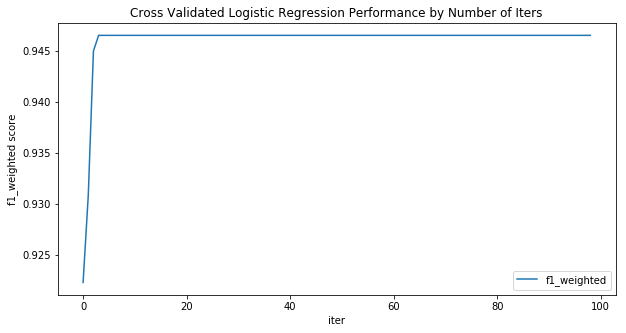

In [94]:
# plot
score_df = pd.DataFrame(lr_gs.grid_scores_, columns = ['max_iter', scoring_function_label, 'values'])
ax = score_df.plot(title= 'Cross Validated Logistic Regression Performance by Number of Iters', figsize=(10,5))
ax.set_xlabel("iter")
ax.set_ylabel(scoring_function_label + ' score')

## Gradient Boosting Trees

In [95]:

gbt_grid = [{'n_estimators' : list(range(1,300))}]

gbt_gs = GridSearchCV(GradientBoostingClassifier(random_state=rand_state),
                       gbt_grid, cv=n_folds, scoring=scoring_function_label)

gbt_gs.fit(X_train, y_train)

# save the best for further analysis
classifiers['Gradient Boosting Trees'] = gbt_gs.best_estimator_

In [9]:
gbt_gs.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=12, presort='auto',
              random_state=RandomState(MT19937) at 0x28A78746EB8,
              subsample=1.0, verbose=0, warm_start=False)

Text(0, 0.5, 'f1_weighted score')

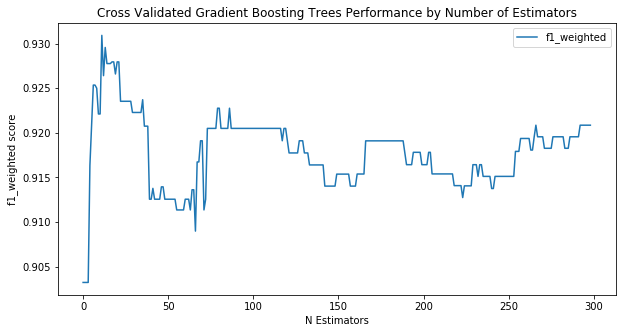

In [96]:
# plot
score_df = pd.DataFrame(gbt_gs.grid_scores_, columns = ['n_estimators', scoring_function_label, 'values'])
ax = score_df.plot(title= 'Cross Validated Gradient Boosting Trees Performance by Number of Estimators', figsize=(10,5))
ax.set_xlabel("N Estimators")
ax.set_ylabel(scoring_function_label + ' score')

## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
rfc_grid = [{'n_estimators' : list(range(1,300))}]

rfc_gs = GridSearchCV(RandomForestClassifier(random_state=rand_state),
                       rfc_grid, cv=n_folds, scoring=scoring_function_label)

rfc_gs.fit(X_train, y_train)

# save the best for further analysis
classifiers['Random Forest'] = rfc_gs.best_estimator_

In [12]:
rfc_gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=25, n_jobs=1, oob_score=False,
            random_state=RandomState(MT19937) at 0x28A78DE6048, verbose=0,
            warm_start=False)

Text(0, 0.5, 'f1_weighted score')

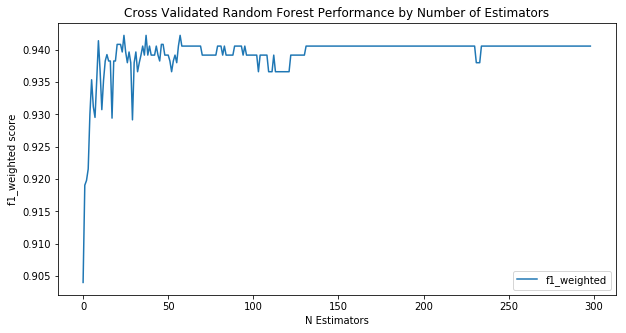

In [97]:
# plot
score_df = pd.DataFrame(rfc_gs.grid_scores_, columns = ['n_estimators', scoring_function_label, 'values'])
ax = score_df.plot(title= 'Cross Validated Random Forest Performance by Number of Estimators', figsize=(10,5))
ax.set_xlabel("N Estimators")
ax.set_ylabel(scoring_function_label + ' score')

## k-Nearest Neighbors

In [98]:
# run KNN for different values of k using CVGridSearch
knn_param_grid = [{'n_neighbors' : list(range(1,100))}]
                               
knn_gs = GridSearchCV(KNeighborsClassifier(), knn_param_grid,
                       cv=n_folds, scoring=scoring_function_label)

knn_gs.fit(X_train, y_train)

# save the best for further analysis
classifiers['KNN'] = knn_gs.best_estimator_

In [15]:
knn_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Text(0, 0.5, 'f1_weighted score')

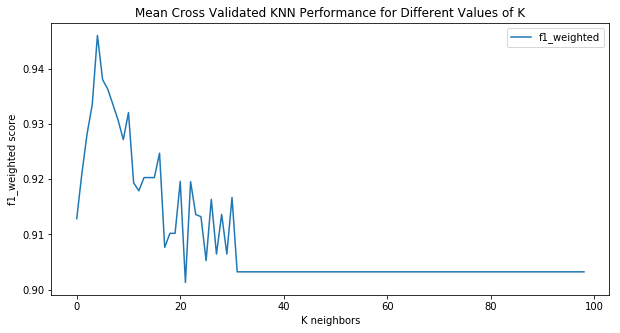

In [99]:
# plot
score_df = pd.DataFrame(knn_gs.grid_scores_, columns = ['n_neighbors', scoring_function_label, 'values'])
ax = score_df.plot(title= 'Mean Cross Validated KNN Performance for Different Values of K', figsize=(10,5))
ax.set_xlabel("K neighbors")
ax.set_ylabel(scoring_function_label + ' score')

In [100]:
pow(np.mean([np.std(scores) for params, mean_score, scores in knn_gs.grid_scores_]),2)
#knn_gs.best_estimator_

2.902032425298785e-05

## Decision Trees

In [18]:
# determine optimal pruning depth for the decision trees using cross-validation grid-search on max_depth
tree_param_grid = [{'max_depth' : list(range(1, X_train.shape[1]))}]

tree_gs = GridSearchCV(DecisionTreeClassifier(random_state=rand_state),
                       tree_param_grid, cv=n_folds, scoring=scoring_function_label)

tree_gs.fit(X_train, y_train)

# save the best for further analysis
classifiers['DecisionTree'] = tree_gs.best_estimator_

In [19]:
tree_gs.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False,
            random_state=RandomState(MT19937) at 0x28A78DE6258,
            splitter='best')

Text(0, 0.5, 'f1_weighted score')

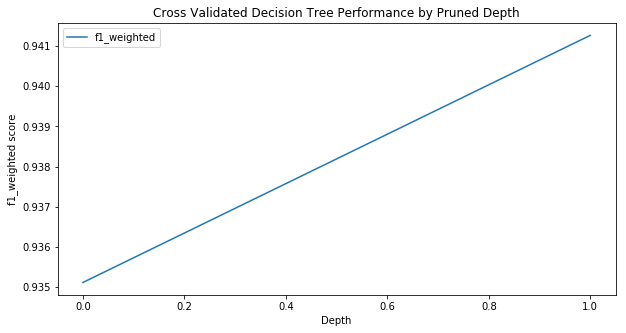

In [101]:
# plot
score_df = pd.DataFrame(tree_gs.grid_scores_, columns = ['max_depth', scoring_function_label, 'values'])
ax = score_df.plot(title= 'Cross Validated Decision Tree Performance by Pruned Depth', figsize=(10,5))
ax.set_xlabel("Depth")
ax.set_ylabel(scoring_function_label + ' score')

## Boosted Trees (AdaBoost)

In [21]:
# determine optimal pruning depth for the decision trees using cross-validation grid-search on max_depth
ada_grid = [{'n_estimators' : list(range(1,300))}]

ada_gs = GridSearchCV(AdaBoostClassifier(random_state=rand_state),
                       ada_grid, cv=n_folds, scoring=scoring_function_label)

ada_gs.fit(X_train, y_train)

# save the best for further analysis
classifiers['AdaBoost'] = ada_gs.best_estimator_

In [22]:
ada_gs.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=15,
          random_state=RandomState(MT19937) at 0x28A78DE6150)

Text(0, 0.5, 'f1_weighted score')

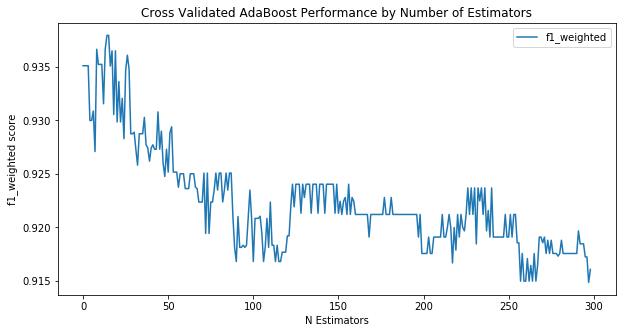

In [102]:
# plot
score_df = pd.DataFrame(ada_gs.grid_scores_, columns = ['n_estimators', scoring_function_label, 'values'])
ax = score_df.plot(title= 'Cross Validated AdaBoost Performance by Number of Estimators', figsize=(10,5))
ax.set_xlabel("N Estimators")
ax.set_ylabel(scoring_function_label + ' score')

## Support Vector Machines
### RBF Kernel

In [30]:
# run cross validation w/ grid search over SVM parameters
svm_rbf_grid = [{'gamma': np.linspace(1e-1, 1e-3,num=10), 'C': list(range(1,500,50))}]

svm_rbf_gs = GridSearchCV(SVC(random_state=rand_state, kernel='rbf', class_weight='balanced', probability= True), svm_rbf_grid,
                       cv=n_folds, scoring=scoring_function_label)

svm_rbf_gs.fit(X_train, y_train)

# save the best for further analysis
classifiers['svm_rbf'] = svm_rbf_gs.best_estimator_

In [86]:
svm_rbf_gs.best_estimator_

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True,
  random_state=RandomState(MT19937) at 0x28A78DE6570, shrinking=True,
  tol=0.001, verbose=False)

D:\anaconda3\envs\theano_3\lib\site-packages\sklearn\model_selection\_search.py:662: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Text(33.0, 0.5, 'C')

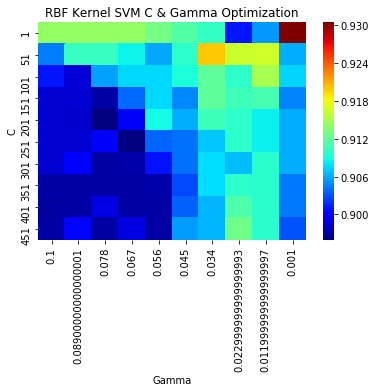

In [32]:
# plot
score_df = pd.DataFrame(columns=svm_rbf_grid[0]['gamma'], index=svm_rbf_grid[0]['C'])

for params, mean_score, scores in svm_rbf_gs.grid_scores_:
    score_df.loc[params['C']][params['gamma']] = mean_score

ax = sns.heatmap(score_df.fillna(value=0.), cmap="jet")
ax.set_title('RBF Kernel SVM C & Gamma Optimization')
ax.set_xlabel("Gamma")
ax.set_ylabel('C')

### Sigmoid Kernel

In [103]:
# run cross validation w/ grid search over SVM parameters
svm_sig_grid = [{'gamma': [round(i,5) for i in np.linspace(1e-2, 1e-5,num=10)],
                 'coef0': [round(i,5) for i in np.linspace(0.0, 0.7,num=10)]}]

svm_sig_gs = GridSearchCV(SVC(random_state=rand_state, kernel='sigmoid', class_weight='balanced', probability= True), svm_sig_grid,
                       cv=n_folds, scoring=scoring_function_label)

svm_sig_gs.fit(X_train, y_train)

# save the best for further analysis
classifiers['svm_sigmoid'] = svm_sig_gs.best_estimator_

In [28]:
svm_sig_gs.best_estimator_

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.7,
  decision_function_shape=None, degree=3, gamma=0.00112, kernel='sigmoid',
  max_iter=-1, probability=True,
  random_state=RandomState(MT19937) at 0x28A78DE6360, shrinking=True,
  tol=0.001, verbose=False)

D:\anaconda3\envs\theano_3\lib\site-packages\sklearn\model_selection\_search.py:662: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Text(33.0, 0.5, 'coef0')

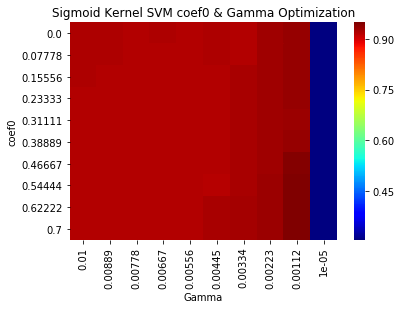

In [29]:
# plot
score_df = pd.DataFrame(columns=svm_sig_grid[0]['gamma'], index=svm_sig_grid[0]['coef0'])

for params, mean_score, scores in svm_sig_gs.grid_scores_:
    score_df.loc[params['coef0']][params['gamma']] = mean_score

ax = sns.heatmap(score_df.fillna(value=0.), cmap="jet")
ax.set_title('Sigmoid Kernel SVM coef0 & Gamma Optimization')
ax.set_xlabel("Gamma")
ax.set_ylabel('coef0')

In [33]:
classifiers

{'Logistic Regression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=4, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=RandomState(MT19937) at 0x28A78746DB0,
           solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
 'Gradient Boosting Trees': GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impurity_split=1e-07, min_samples_leaf=1,
               min_samples_split=2, min_weight_fraction_leaf=0.0,
               n_estimators=12, presort='auto',
               random_state=RandomState(MT19937) at 0x28A78746EB8,
               subsample=1.0, verbose=0, warm_start=False),
 'Random Forest': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None

In [36]:
# re-run the model with optimum k over different training set sizes & plot
# build a dataframe containing the results of these experiments
n_training = range(70,y_train.shape[0],100)

performance_columns = ['classifier', 'dataset', 'n-training_samples', scoring_function_label]
sub_sampling_performance = pd.DataFrame(columns=performance_columns)

for lbl, clf in zip(classifiers.keys(), classifiers.values()):
    training_array, testing_array = run_training_range(clf, scoring_function, n_training, 
                                                       X_train, y_train.astype('int32'),
                                                       X_test, y_test, average='binary')
    
    training_df = pd.DataFrame(columns=performance_columns)
    training_df['n-training_samples'] = n_training
    training_df[scoring_function_label] = training_array
    training_df['classifier'] = [lbl] * len(training_df)
    training_df['dataset'] = ['train'] * len(training_df)
    
    testing_df = pd.DataFrame(columns=performance_columns)
    testing_df['n-training_samples'] = n_training
    testing_df[scoring_function_label] = testing_array
    testing_df['classifier'] = [lbl] * len(testing_df)
    testing_df['dataset'] = ['test'] * len(testing_df)
    print(lbl)
    sub_sampling_performance = pd.concat([sub_sampling_performance, training_df, testing_df], axis=0)

Logistic Regression
Gradient Boosting Trees
Random Forest
KNN
DecisionTree
AdaBoost
svm_rbf
svm_sigmoid


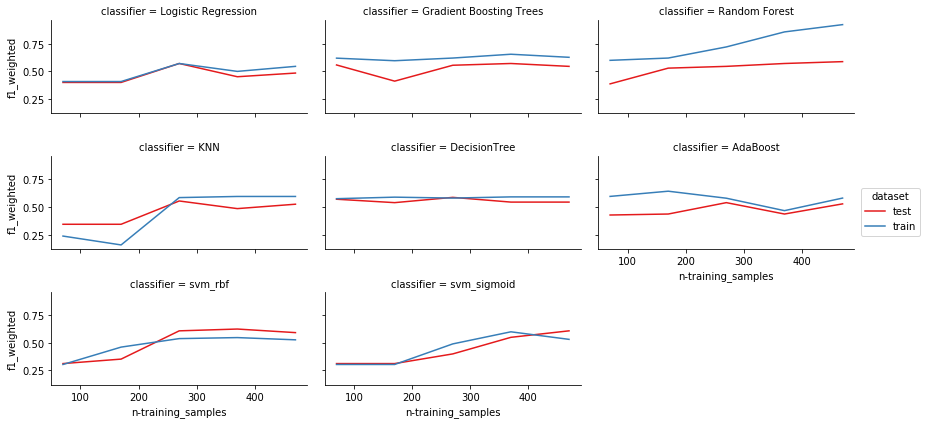

In [37]:
g = sns.FacetGrid(sub_sampling_performance, col='classifier', col_wrap=3,
                  hue='dataset',palette="Set1", size=2, aspect=2,
                  hue_order=["test", "train"])
g = g.map(plt.plot, "n-training_samples", scoring_function_label).add_legend()

## Print confusion_matrix for every classifier (just a test coding)

In [38]:
for i, (label, clf) in enumerate(zip(classifiers.keys(), classifiers.values())):
    M = confusion_matrix(y_test, clf.predict(X_test))
    print(label)
    print(M)

Logistic Regression
[[232   2]
 [ 15   8]]
Gradient Boosting Trees
[[233   1]
 [ 14   9]]
Random Forest
[[233   1]
 [ 13  10]]
KNN
[[229   5]
 [ 13  10]]
DecisionTree
[[233   1]
 [ 14   9]]
AdaBoost
[[232   2]
 [ 14   9]]
svm_rbf
[[219  15]
 [  7  16]]
svm_sigmoid
[[225   9]
 [  9  14]]


# Function of evaluation index

In [19]:

from sklearn import metrics

def evaluate_clustering(lst_true_label, lst_pred_label, encoding=None, affinity=None, eval_method=range(1,10),**kwargs):
    '''
    Output: a dict with 'method_name'-'score' as key-value pairs.

    - `eval_method` (list) indicates which method to use.
        Nine types of evaluation methods available :
            0. Accuracy, Precision, Recall, F1-Score
            1. Rand Score (Index) and Adjusted Rand Score (Index)
            2. Mutual Information based scores (NMI score and AMI score)
            3. Homogeneity, completeness and V-measure
            4. Fowlkes-Mallows scores
            5. Silhouette Coefficient
            6. Calinski-Harabasz Index
            7. Davies-Bouldin Index
            8. Contingency Matrix
            9. Pair Confusion Matrix

    - The input `encoding` is a must-have input only for 
        `5. Silhouette Coefficient`, 
        `6. Calinski-Harabasz Index`, 
        `7. Davies-Bouldin Index`. 

    - The input `affinity` is an optional input only for `5. Silhouette Coefficient` method   
    
    Note that :
    1/ the following clustering evaluation methods are symmetric: swapping the argument does not change the scores.
        1. Rand Index (RI), Adjusted Rand Index (ARI)
        2. Mutual Information (MI), Adjusted Mutual Information (AMI), Normalised Mutual Information (NMI)
        3. V-measure Score

    2/ For Precision, Recall, F1-Score, Fbeta in method 0, by default the `1`s in the true/pred label are regraded as `Positive Examlpe`, but a `pos_label` parameter can be fed to them to indicate the positive labels.

    More details at: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
    '''
    res = {}
    # 0. Accuracy, Precision, Recall, F1-Score, Fbeta
    if 0 in eval_method:
        res["0_accuracy"] = metrics.accuracy_score(lst_true_label, lst_pred_label)
        pos_label = kwargs["pos_label"] if "pos_label" in kwargs.keys() else 1
        res["0_precision"],res["0_sensitivity"],res["0_f1_score"] = \
            metrics.precision_score(lst_true_label, lst_pred_label,pos_label=pos_label), metrics.recall_score(lst_true_label, lst_pred_label,pos_label=pos_label), metrics.f1_score(lst_true_label, lst_pred_label,pos_label=pos_label)
        cm = metrics.confusion_matrix(lst_true_label, lst_pred_label)
        tn, fp, fn, tp = cm.ravel()
        res["0_specificity"] = tn/(tn+fp) if tn+fp!=0 else tn        
        
        if "fbeta":
            if "beta_fbeta" in kwargs.keys():
                beta_fbeta = kwargs["beta_fbeta"]
            else:
                beta_fbeta = 2
            res[f"0_f{beta_fbeta}_score"] = metrics.fbeta_score(lst_true_label, lst_pred_label,pos_label=pos_label, beta=beta_fbeta)
    # 1. Rand Score
    if 1 in eval_method:
        res["1_rand score"] = metrics.rand_score(lst_true_label, lst_pred_label)
        res["1_adjusted_rand_score"] = metrics.adjusted_rand_score(lst_true_label, lst_pred_label)
    # 2. Mutual Information based scores
    if 2 in eval_method:
        res["2_NMI score"] = metrics.normalized_mutual_info_score(lst_true_label, lst_pred_label)
        res["2_AMI score"] = metrics.adjusted_mutual_info_score(lst_true_label, lst_pred_label)
    # 3. Homogeneity, completeness and V-measure
    if 3 in eval_method:
        res["3_homogeneity_score"] = metrics.homogeneity_score(lst_true_label, lst_pred_label)
        res["3_completeness_score"] = metrics.completeness_score(lst_true_label, lst_pred_label)
        res["3_v_measure_score"] = metrics.v_measure_score(lst_true_label, lst_pred_label, beta=1.0)
    # 4. Fowlkes-Mallows scores
    if 4 in eval_method:
        res["4_fowlkes_mallows_score"] = metrics.fowlkes_mallows_score(lst_true_label, lst_pred_label)
    # 5. Silhouette Coefficient
    if 5 in eval_method and encoding is not None :
        try:
            if affinity is not None:
                res["5_silhouette_score"] = metrics.silhouette_score(encoding, lst_pred_label, metric=affinity)
            else:
                res["5_silhouette_score"] = metrics.silhouette_score(encoding, lst_pred_label)
        except:
            res["5_silhouette_score"] = None
    # 6. Calinski-Harabasz Index
    if 6 in eval_method and encoding is not None:
        try:
            res["6_calinski_harabasz_score"] = metrics.calinski_harabasz_score(encoding, lst_pred_label)
        except:
            res["6_calinski_harabasz_score"] = None
    # 7. Davies-Bouldin Index
    if 7 in eval_method and encoding is not None:
        try:
            res["7_davies_bouldin_score"] = metrics.davies_bouldin_score(encoding, lst_pred_label)
        except:
            res["7_davies_bouldin_score"] = None
    # 8. Contingency Matrix
    if 8 in eval_method:
        res["8_Contingency Matrix"] = metrics.cluster.contingency_matrix(lst_true_label, lst_pred_label)
    # 9. Pair Confusion Matrix
    if 9 in eval_method:
        res["9_pair_confusion_matrix"] = metrics.cluster.pair_confusion_matrix(lst_true_label, lst_pred_label)
    return res



## Caculate all the index value for all the traditional machine learning classifiers

In [42]:
for i, (label, clf) in enumerate(zip(classifiers.keys(), classifiers.values())):
    res = evaluate_clustering(y_test, clf.predict(X_test), encoding=None, affinity=None, eval_method=[0])
    print("classifier name: {}, evaluation: {}".format(label,res))


classifier name: Logistic Regression, evaluation: {'0_accuracy': 0.933852140077821, '0_precision': 0.8, '0_sensitivity': 0.34782608695652173, '0_f1_score': 0.48484848484848486, '0_specificity': 0.9914529914529915, '0_f2_score': 0.39215686274509803}
classifier name: Gradient Boosting Trees, evaluation: {'0_accuracy': 0.9416342412451362, '0_precision': 0.9, '0_sensitivity': 0.391304347826087, '0_f1_score': 0.5454545454545454, '0_specificity': 0.9957264957264957, '0_f2_score': 0.4411764705882353}
classifier name: Random Forest, evaluation: {'0_accuracy': 0.9455252918287937, '0_precision': 0.9090909090909091, '0_sensitivity': 0.43478260869565216, '0_f1_score': 0.5882352941176471, '0_specificity': 0.9957264957264957, '0_f2_score': 0.48543689320388345}
classifier name: KNN, evaluation: {'0_accuracy': 0.9299610894941635, '0_precision': 0.6666666666666666, '0_sensitivity': 0.43478260869565216, '0_f1_score': 0.5263157894736841, '0_specificity': 0.9786324786324786, '0_f2_score': 0.46728971962616

## Plot confusion_matrix for all the traditional machine learning classifiers

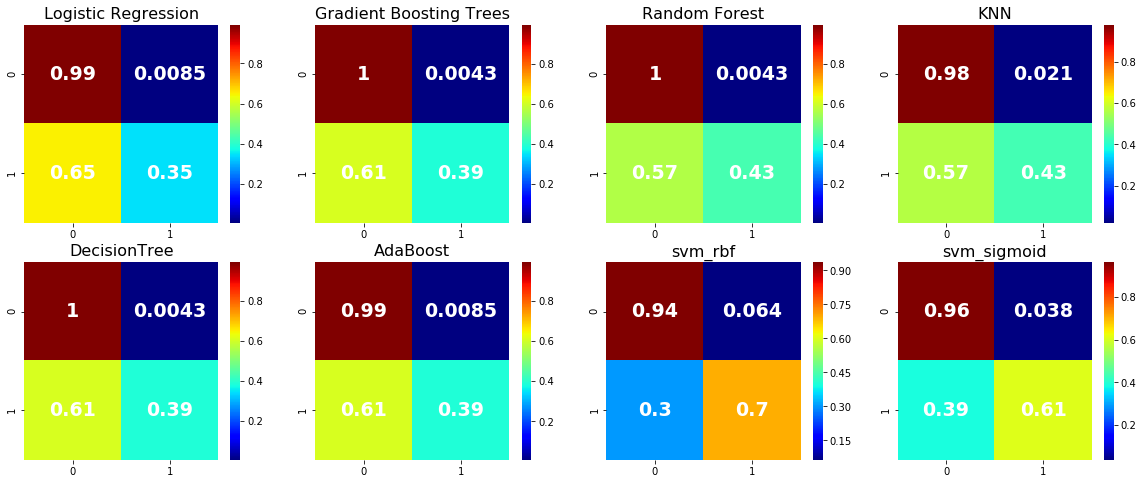

In [43]:
##plot Confusion Matricies at image level
fig, axs = plt.subplots(2,4)
fig.set_size_inches(20,8)
for i, (label, clf) in enumerate(zip(classifiers.keys(), classifiers.values())):
    M = confusion_matrix(y_test, clf.predict(X_test))
    M_nor = np.empty(shape=[2, 2])
    M_nor[0][0]=M[0][0]/(M[0][0]+M[0][1])
    M_nor[0][1]=M[0][1]/(M[0][0]+M[0][1])
    M_nor[1][0]=M[1][0]/(M[1][0]+M[1][1])
    M_nor[1][1]=M[1][1]/(M[1][0]+M[1][1])
    sns.heatmap(M_nor, ax=axs.flat[i], cmap="jet", annot=True, annot_kws={'size':19,'weight':'bold', 'color':'white'})
    axs.flat[i].set_title(label,fontsize=16)

## Define MajorityVote function for all the classifier

In [44]:
def training_MajorityVote_classifiers(all_dataframe, classifiers):    
    res=[]
#    M = np.empty(shape=[2, 2])
    X=all_dataframe[features]
    y=all_dataframe['class']
    for clf in classifiers.values():
        clf.fit(X,y)
        y_pred=clf.predict(X)
        res.append(y_pred)
    
    y_pred_last=[]
    for j in range(len(y)):
        if sum(pd.DataFrame(res)[j]==y[j])>=len(classifiers)/2:
            y_pred_last.append(y[j])
        else:
            y_pred_last.append(1-y[j])
            

    CM=confusion_matrix(y, y_pred_last)

    return res,CM,y_pred_last


In [45]:
res,M,y_pred_last=training_MajorityVote_classifiers(df, classifiers)

In [46]:
M_nor

array([[0.96153846, 0.03846154],
       [0.39130435, 0.60869565]])

In [47]:
res = evaluate_clustering(y, y_pred_last, encoding=None, affinity=None, eval_method=[0])

In [48]:
res

{'0_accuracy': 0.9588688946015425,
 '0_precision': 0.9629629629629629,
 '0_sensitivity': 0.45614035087719296,
 '0_f1_score': 0.6190476190476191,
 '0_specificity': 0.9986130374479889,
 '0_f2_score': 0.5098039215686275}

## plot MajorityVote result of confusion_matrix of all classifiers

Text(0.5, 15.0, 'Predicted label')

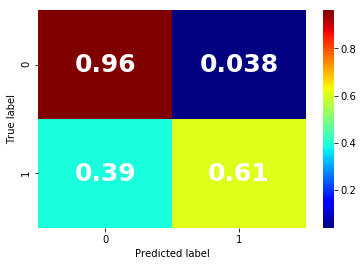

In [50]:

fig, axs = plt.subplots(1,1)
sns.heatmap(M_nor, cmap="jet", annot=True, annot_kws={'size':25,'weight':'bold', 'color':'white'})
axs.set_ylabel('True label')
axs.set_xlabel('Predicted label')

# Plot ROC curves for all the traditional machine learning classifiers

In [ ]:
def plot_auc(y_test, y_pred, showfig=False, title=None, outpath=None):
    auc = metrics.roc_auc_score(y_test, y_pred)

    false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

    plt.figure(figsize=(10, 8), dpi=100)
    plt.axis('scaled')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title("AUC & ROC Curve")
    plt.plot(false_positive_rate, true_positive_rate, 'g')
    plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
    plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    if showfig:
        plt.show()
    if title is not None:
        plt.title(str(title))
    if outpath is not None:
        plt.savefig(outpath, bbox_inches='tight', dpi=100)

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Logistic Regression AUC: 0.69
Gradient Boosting Trees AUC: 0.69
Random Forest AUC: 0.72
KNN AUC: 0.69
DecisionTree AUC: 0.69
AdaBoost AUC: 0.71
svm_rbf AUC: 0.82
svm_sigmoid AUC: 0.81


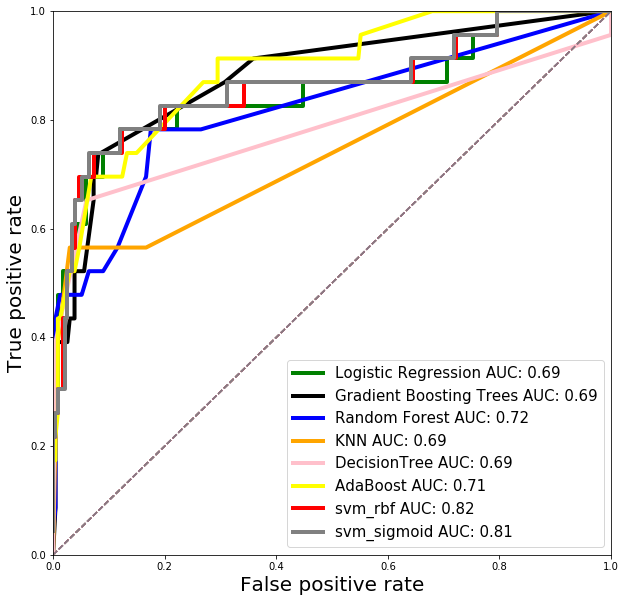

In [78]:
fig, axs = plt.subplots(1,1,figsize=(10,10))
#fig.set_size_inches(20,20) 
modelauc=np.zeros(8) 
colors=['green','black',"blue", 'orange', "pink","yellow",'red',"grey"]
for i, (label, clf) in enumerate(zip(classifiers.keys(), classifiers.values())):
#    M = confusion_matrix(y_test, clf.predict(X_test))    
    clf.fit(X_train,y_train)

    y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
      
    
    modelauc = roc_auc_score(y_test, y_pred)


    # calculate roc curve
    fpr_0, tpr_0, thresholds_0 = roc_curve(y_test, probs)
#    fpr_0, tpr_0, thresolds = metrics.roc_curve(y_test, y_pred)   
    
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    label = label + ' AUC:' + ' {0:.2f}'.format(modelauc)
    print(label)
    plt.plot(fpr_0, tpr_0,color=colors[i],label = label, linewidth = 4)
    axs.set_xlabel('False positive rate', fontsize = 20)
    axs.set_ylabel('True positive rate', fontsize = 20)
    axs.set_xlim(left=0,right=1)
    axs.set_ylim(bottom=0,top=1) 
    plt.legend(loc = 'lower right', fontsize = 15)

#print(modelauc)
plt.show()


## collect performance stats on all classifiers

Text(0.5, 0, 'f1_weighted')

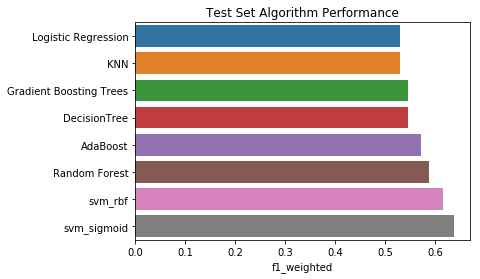

In [89]:

performance = compare_classifiers(classifiers, scoring_function,
                                  X_test, y_test,
                                  average='binary')

performance = pd.DataFrame.from_dict(performance, orient='index')
performance.columns = [scoring_function_label]
performance.sort_values(by=['f1_weighted'],ascending=True,inplace=True)

# plot
ax = sns.barplot(x=scoring_function_label, y=performance.index, data=performance, orient='h')
ax.set_title('Test Set Algorithm Performance')
ax.set_xlabel(scoring_function_label)

In [90]:
performance

,f1_weighted
Logistic Regression,0.529412
KNN,0.529412
Gradient Boosting Trees,0.545455
DecisionTree,0.545455
AdaBoost,0.571429
Random Forest,0.588235
svm_rbf,0.615385
svm_sigmoid,0.638298


# Lets use random forest and find accuracy according to chosen features.

## Tree based feature selection and random forest classification

Feature ranking:
1. feature 0 (0.388921)
2. feature 1 (0.345760)
3. feature 2 (0.265319)


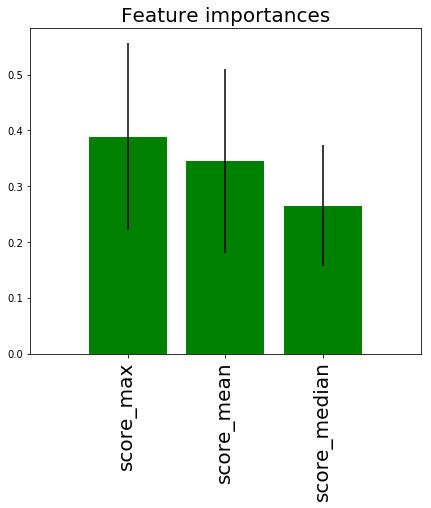

In [88]:
#In random forest classification method there is a featureimportances attributes that is the feature importances (the higher, the more important the feature). !!! To use feature_importance method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.
svm_sig_grid = [{'gamma': [round(i,5) for i in np.linspace(1e-2, 1e-5,num=10)],
                 'coef0': [round(i,5) for i in np.linspace(0.0, 0.7,num=10)]}]

svm_sig_gs = GridSearchCV(SVC(random_state=rand_state, kernel='sigmoid', class_weight='balanced'), svm_sig_grid,
                       cv=n_folds, scoring=scoring_function_label)

#svm_sig_gs.fit(X_train, y_train)
clf_rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=196, n_jobs=1,
            oob_score=False,
            random_state=rand_state)  


clf_rf_5 = clf_rf    
clr_rf_5 = clf_rf_5.fit(X_train, y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(7, 6))
plt.title("Feature importances", fontsize = 20)
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90, fontsize = 20)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Threshold beased calssification

## calculated the evaluation result of index

In [26]:
##threshold equal .5
threshold=all_dataframe_features['score_max'].quantile(q=.5)
y_pred_5 = np.where(all_dataframe_features['score_max']>threshold, 1, 0)
res = evaluate_clustering(y, y_pred, encoding=None, affinity=None, eval_method=[0])

In [150]:
res

{'0_accuracy': 0.5552699228791774,
 '0_precision': 0.12853470437017994,
 '0_sensitivity': 0.8771929824561403,
 '0_f1_score': 0.22421524663677125,
 '0_specificity': 0.5298196948682385,
 '0_f2_score': 0.4051863857374392}

In [27]:
##threshold equal .75
threshold=all_dataframe_features['score_max'].quantile(q=.75)
y_pred_75 = np.where(all_dataframe_features['score_max']>threshold, 1, 0)
res = evaluate_clustering(y, y_pred, encoding=None, affinity=None, eval_method=[0])

In [152]:
res

{'0_accuracy': 0.7917737789203085,
 '0_precision': 0.23076923076923078,
 '0_sensitivity': 0.7894736842105263,
 '0_f1_score': 0.35714285714285715,
 '0_specificity': 0.7919556171983356,
 '0_f2_score': 0.5319148936170214}

In [30]:
all_dataframe_features = pd.DataFrame({'ID':df['ID'],'score_max':df['score_max'],'score_mean':X['score_mean'], 
                                       'score_median':X['score_median'],'class':df['class']})
all_dataframe_features.sort_values(by=['ID'],ascending=True,inplace=True)

data=all_dataframe_features
##threshold equal .5

threshold_5=X_test['score_max'].quantile(q=.5)
y_pred_quantile5 = np.where(X_test['score_max']>threshold_5, 1, 0)

threshold_75=X_test['score_max'].quantile(q=.75)
y_pred_quantile75 = np.where(X_test['score_max']>threshold_75, 1, 0)

## Plot the ROC curve of threshold based classification

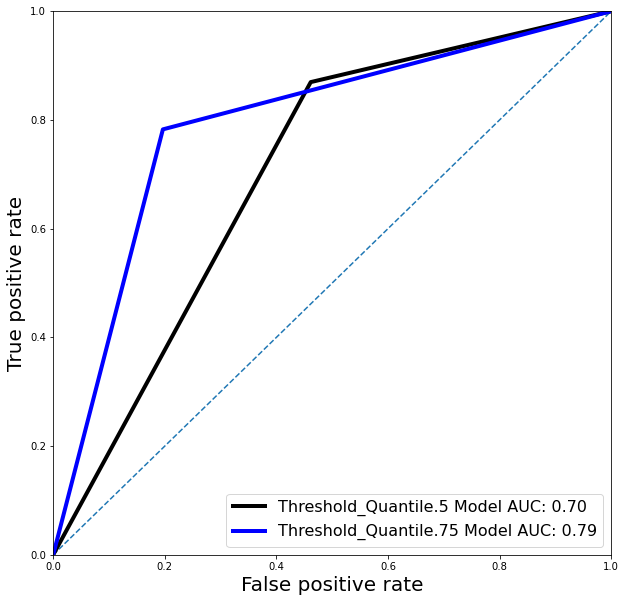

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#total = len(y_test)
#class_1_count = np.sum(y_test)
#class_0_count = total - class_1_count
plt.figure(figsize = (10, 10))
    
plt.plot([0, 1], [0, 1], linestyle='--')
#th 5   
modelauc_th5 = roc_auc_score(y_test, y_pred_quantile5)
fpr_th5, tpr_th5, thresholds_th5 = roc_curve(y_test, y_pred_quantile5)    

plt.plot(fpr_th5, tpr_th5, 
         c = 'black', 
         label = 'Threshold_Quantile.5 Model AUC:' + ' {0:.2f}'.format(modelauc_th5), 
         linewidth = 4)


#th 75   
modelauc_th75 = roc_auc_score(y_test, y_pred_quantile75)
fpr_th75, tpr_th75, thresholds_th75 = roc_curve(y_test, y_pred_quantile75)    

plt.plot(fpr_th75, tpr_th75, 
         c = 'b', 
         label = 'Threshold_Quantile.75 Model AUC:' + ' {0:.2f}'.format(modelauc_th75), 
         linewidth = 4)
# Plot information
plt.xlabel('False positive rate', fontsize = 20)
plt.ylabel('True positive rate', fontsize = 20)
plt.xlim(left=0,right=1)
plt.ylim(bottom=0,top=1)
#plt.title('Cumulative Accuracy Profile', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)